In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

%matplotlib inline



In [2]:
# Open Earthchem dataset
df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
columns = df.keys()
df.columns = columns
df

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,...,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,...,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,...,101.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [3]:
df.describe()

,IGSN,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MINERAL,SIO2,TIO2,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
count,0.0,3063.000000,3063.000000,3063.000000,1352.000000,1440.000000,1352.000000,0.0,2140.000000,2137.000000,...,1647.000000,200.000000,239.000000,239.000000,33.000000,81.000000,163.000000,81.000000,163.000000,3.0
mean,NaN,-29.436414,-69.961676,0.009968,40.972882,54.259535,66.329437,NaN,69.727827,0.506845,...,190.392557,828.254428,18.374184,18.374184,3.537576,0.562716,0.966994,0.562716,0.966994,0.0
std,NaN,9.817008,2.227382,0.000567,258.564503,320.506284,396.412106,NaN,4.586499,0.295716,...,151.644587,890.055116,24.401248,24.401248,4.166317,0.535546,0.875199,0.535546,0.875199,0.0
min,NaN,-54.800000,-78.518000,0.000010,-0.002000,-19.300000,-0.000409,NaN,36.782000,0.002000,...,0.000000,0.005000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,-38.769400,-71.699050,0.010000,-0.000001,-0.000001,-0.000001,NaN,66.144000,0.287000,...,124.000000,655.512500,8.000000,8.000000,1.000000,0.200000,0.210000,0.200000,0.210000,0.0
50%,NaN,-26.420000,-70.250000,0.010000,0.010000,1.305000,2.600000,NaN,69.327500,0.539000,...,169.000000,718.700000,12.910000,12.910000,1.600000,0.330000,0.790000,0.330000,0.790000,0.0
75%,NaN,-21.246800,-68.000000,0.010000,2.600000,12.800000,16.000000,NaN,73.389750,0.659000,...,221.000000,760.175000,22.175000,22.175000,5.510000,0.750000,1.510000,0.750000,1.510000,0.0
max,NaN,-6.975000,-64.440000,0.010000,2500.000000,3175.000000,3850.000000,NaN,85.189000,4.812000,...,2488.000000,5000.000000,280.000000,280.000000,20.000000,2.530000,4.860000,2.530000,4.860000,0.0


# Drop rows with no Silica values 
To see if a sample is obsidian, we need to know their silica value

In [4]:
df.dropna(subset=['SIO2'])

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,...,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,...,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,AJO 017,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.2167,-69.2125,0.01,2.6,12.80,...,73.0,NaN,NaN,NaN,NaN,NaN,0.79,NaN,0.79,NaN
3057,AJO017,NaN,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",NaN,-18.2458,-69.2194,0.01,NaN,NaN,...,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,...,101.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN


In [5]:
# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns


Index(['SAMPLE ID', 'SOURCE', 'REFERENCE', 'LATITUDE', 'LONGITUDE', 'LOC PREC',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'SIO2', 'TIO2', 'AL2O3',
       'FEOT', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR',
       'TH', 'ZR'],
      dtype='object')

# Heatmap

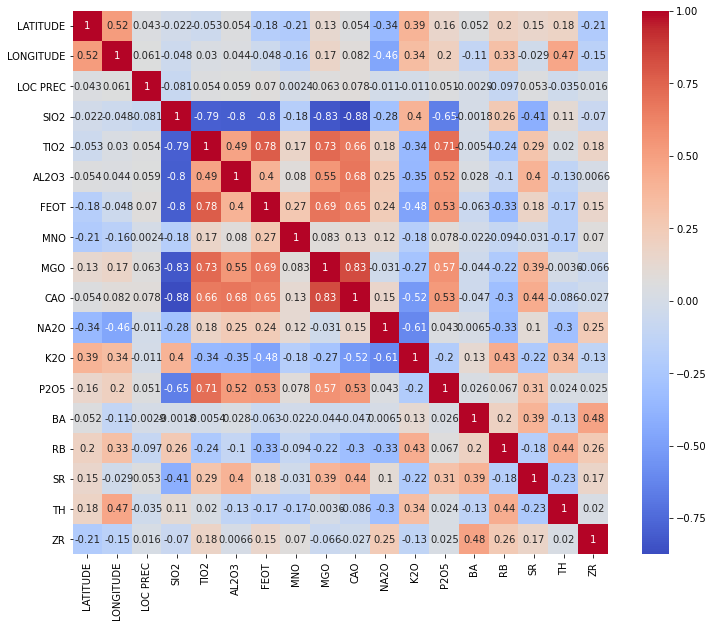

In [6]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

# Classification vs Clustering

Try it on the 4 seperated locations

In [7]:

# Plotting 4 separated samples

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          #'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          #'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          #'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          #'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns

data_four = df

data_four['target']= data_four['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_four['target'] = data_four['target'].fillna(0)
# Make target column int
data_four['target'] = data_four['target'].astype(float).astype(int)

# Drop targets that are not the 4 references
data_four = data_four[data_four['target'] >=1]
data_four



,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,...,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target
186,CG 81A,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9,2
187,REAL GRANDE WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,0.853,2.307,5.818,NaN,NaN,NaN,NaN,NaN,NaN,2
188,MIDDLE MERIHUACA GREY,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,0.770,1.701,5.702,NaN,NaN,NaN,NaN,NaN,NaN,2
191,MIDDLE MERIHUACA WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,0.940,2.300,5.399,NaN,NaN,NaN,NaN,NaN,NaN,2
192,PITAS WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,0.850,2.601,5.902,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,CG 125,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,...,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7,2
3029,CG 140,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,...,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0,2
3030,CG 218,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,...,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8,2
3031,CG 227B,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8536,-66.8245,0.01,igneous,volcanic,felsic,rhyodacite,...,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3,2


In [8]:
data_four

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,...,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target
186,CG 81A,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9,2
187,REAL GRANDE WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,0.853,2.307,5.818,NaN,NaN,NaN,NaN,NaN,NaN,2
188,MIDDLE MERIHUACA GREY,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,0.770,1.701,5.702,NaN,NaN,NaN,NaN,NaN,NaN,2
191,MIDDLE MERIHUACA WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,0.940,2.300,5.399,NaN,NaN,NaN,NaN,NaN,NaN,2
192,PITAS WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,...,0.850,2.601,5.902,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,CG 125,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,...,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7,2
3029,CG 140,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,...,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0,2
3030,CG 218,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,...,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8,2
3031,CG 227B,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8536,-66.8245,0.01,igneous,volcanic,felsic,rhyodacite,...,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3,2


In [9]:
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

data_four= data_four.dropna()

X = data_four[features]
X = X.drop(['target'],axis = 1)
y = data_four['target']
y.unique()

array([ 2, 10,  7,  5])

In [10]:
X

,LATITUDE,LONGITUDE,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
186,-25.9800,-67.2100,68.089,0.531,16.421,2.904,0.04,1.111,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9
197,-25.9800,-67.2100,69.675,0.539,15.073,2.795,0.05,1.088,2.496,2.795,5.290,0.20,496.1,278.2,266.2,25.0,159.2
198,-25.9800,-67.2100,69.965,0.570,15.292,2.999,0.05,1.009,2.299,3.198,4.398,0.22,504.7,247.3,256.5,28.5,178.7
201,-25.9800,-67.2100,69.977,0.471,15.117,2.603,0.05,1.011,2.503,3.103,5.006,0.16,587.9,233.8,285.9,21.8,155.5
205,-25.9800,-67.2100,70.207,0.460,15.402,2.400,0.04,0.910,2.500,3.300,4.600,0.18,407.3,258.8,260.4,23.1,133.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,-25.8500,-66.8100,70.000,0.540,14.900,2.800,0.05,1.110,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7
3029,-25.8500,-66.8100,69.921,0.610,14.804,3.001,0.05,1.190,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0
3030,-25.8500,-66.8100,70.393,0.590,14.599,2.900,0.05,1.160,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8
3031,-25.8536,-66.8245,68.945,0.610,15.288,2.998,0.05,1.219,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3


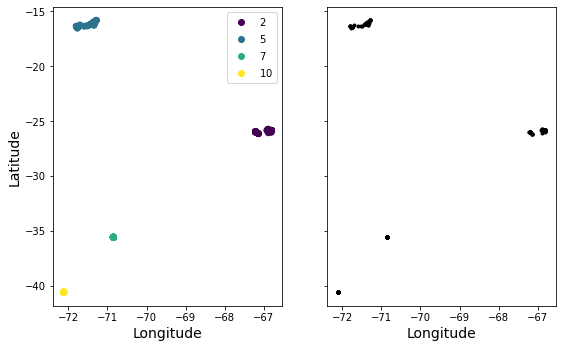

In [11]:
# Plotting targets on lat vs. long 

# y values : [ 2, 10,  7,  5]

plt.figure(figsize=(9, 5.5))

plt.subplot(121)

s = plt.scatter(X['LONGITUDE'], X['LATITUDE'],c = y)
plt.legend(*s.legend_elements())
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)


plt.subplot(122)
plt.scatter(X['LONGITUDE'], X['LATITUDE'], c="k", marker=".")
plt.xlabel("Longitude", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

# GAUSSIAN MIXTURE MODEL

In [12]:
from sklearn.mixture import GaussianMixture

In [13]:
y_pred = GaussianMixture(n_components=3,
                         random_state=42).fit(X).predict(X)

In [14]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{2: 2, 1: 5, 0: 10}

In [15]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [16]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

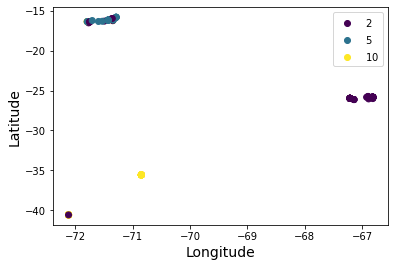

In [17]:

s = plt.scatter(X['LONGITUDE'], X['LATITUDE'],c = y_pred)
plt.legend(*s.legend_elements())
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.show()

In [18]:
np.sum(y_pred==y)

116

In [19]:
np.sum(y_pred==y) / len(y_pred)

0.725

# Kmeans

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [21]:
data_four_elements = data_four[features]
data_four_elements = data_four_elements.drop(['LATITUDE','LONGITUDE','target'],axis=1)
data_four_elements

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
186,68.089,0.531,16.421,2.904,0.04,1.111,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9
197,69.675,0.539,15.073,2.795,0.05,1.088,2.496,2.795,5.290,0.20,496.1,278.2,266.2,25.0,159.2
198,69.965,0.570,15.292,2.999,0.05,1.009,2.299,3.198,4.398,0.22,504.7,247.3,256.5,28.5,178.7
201,69.977,0.471,15.117,2.603,0.05,1.011,2.503,3.103,5.006,0.16,587.9,233.8,285.9,21.8,155.5
205,70.207,0.460,15.402,2.400,0.04,0.910,2.500,3.300,4.600,0.18,407.3,258.8,260.4,23.1,133.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,70.000,0.540,14.900,2.800,0.05,1.110,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7
3029,69.921,0.610,14.804,3.001,0.05,1.190,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0
3030,70.393,0.590,14.599,2.900,0.05,1.160,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8
3031,68.945,0.610,15.288,2.998,0.05,1.219,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3


In [22]:
#PCA
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data_four_elements)
 
df.shape

(160, 2)

In [23]:
#Initialize the class object
kmeans = KMeans(n_clusters= 4, random_state = 42)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

score = silhouette_score(df, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.586


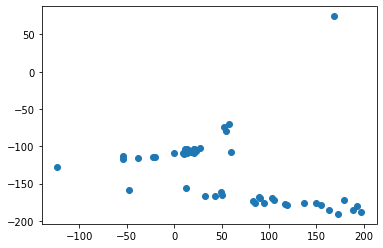

In [24]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

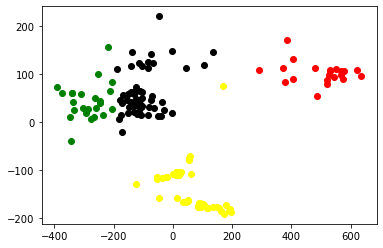

In [25]:
#filter rows of original data
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label0 = df[label == 0]
 
#Plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'yellow')

plt.show()

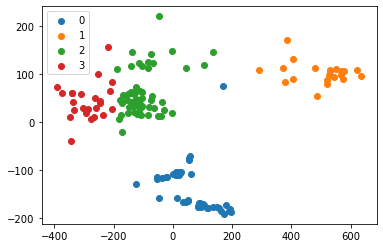

In [26]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

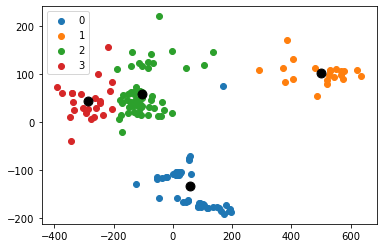

In [27]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [28]:
centroids

array([[  56.29605091, -133.20306581],
       [ 498.56388887,  102.6275399 ],
       [-103.24526862,   58.97191074],
       [-287.19934961,   44.00627948]])

In [29]:
# Calculate Silhoutte Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

score = silhouette_score(df, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.586


In [30]:
data_four_elements

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
186,68.089,0.531,16.421,2.904,0.04,1.111,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9
197,69.675,0.539,15.073,2.795,0.05,1.088,2.496,2.795,5.290,0.20,496.1,278.2,266.2,25.0,159.2
198,69.965,0.570,15.292,2.999,0.05,1.009,2.299,3.198,4.398,0.22,504.7,247.3,256.5,28.5,178.7
201,69.977,0.471,15.117,2.603,0.05,1.011,2.503,3.103,5.006,0.16,587.9,233.8,285.9,21.8,155.5
205,70.207,0.460,15.402,2.400,0.04,0.910,2.500,3.300,4.600,0.18,407.3,258.8,260.4,23.1,133.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,70.000,0.540,14.900,2.800,0.05,1.110,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7
3029,69.921,0.610,14.804,3.001,0.05,1.190,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0
3030,70.393,0.590,14.599,2.900,0.05,1.160,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8
3031,68.945,0.610,15.288,2.998,0.05,1.219,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3


In [31]:
y = data_four['target']
X = data_four_elements[['SIO2','TIO2','AL2O3','FEOT','MNO','MGO','CAO','NA2O','K2O','P2O5',
                       'BA','RB','SR','TH','ZR']]

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5397951945868288
For n_clusters = 3 The average silhouette_score is : 0.6391430775963709
For n_clusters = 4 The average silhouette_score is : 0.7454287961149871
For n_clusters = 5 The average silhouette_score is : 0.6158531836433444
For n_clusters = 6 The average silhouette_score is : 0.47576335987316803


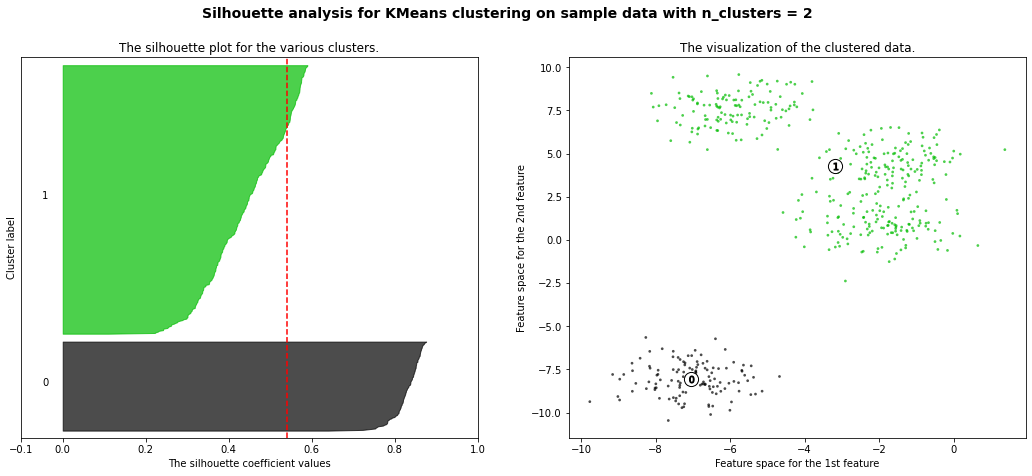

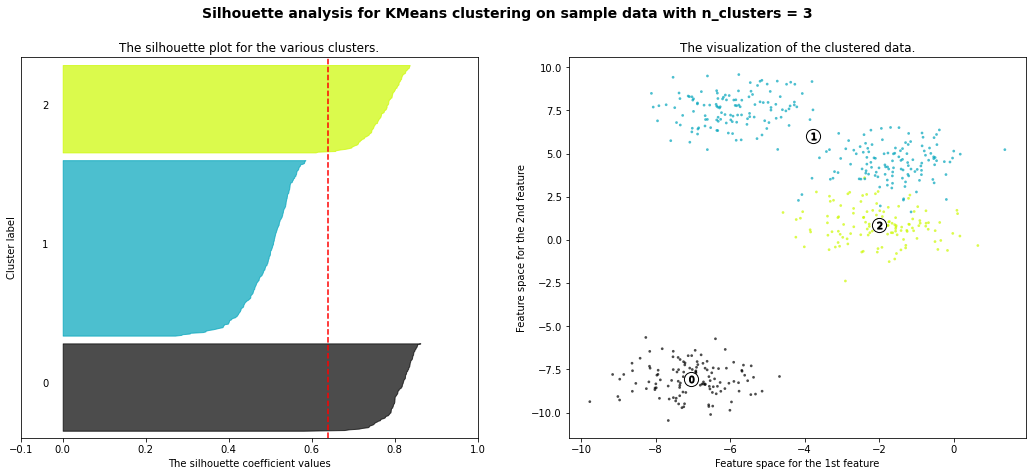

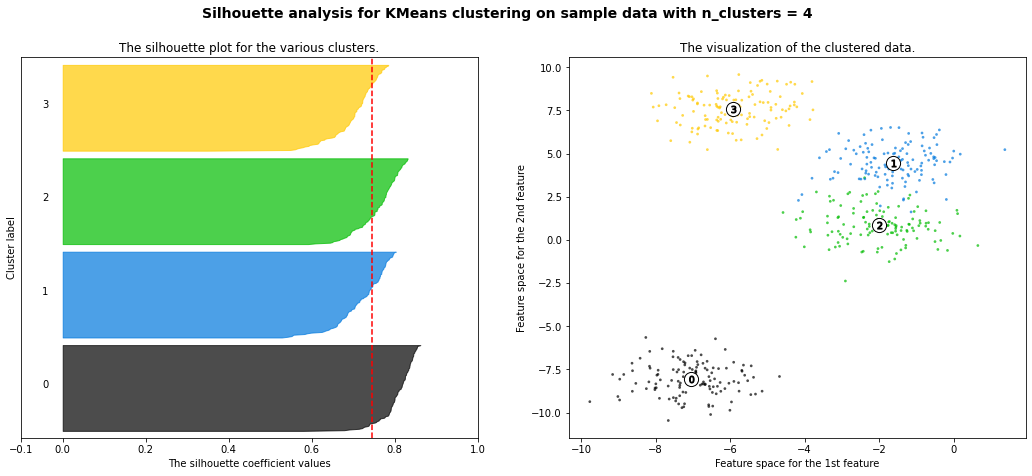

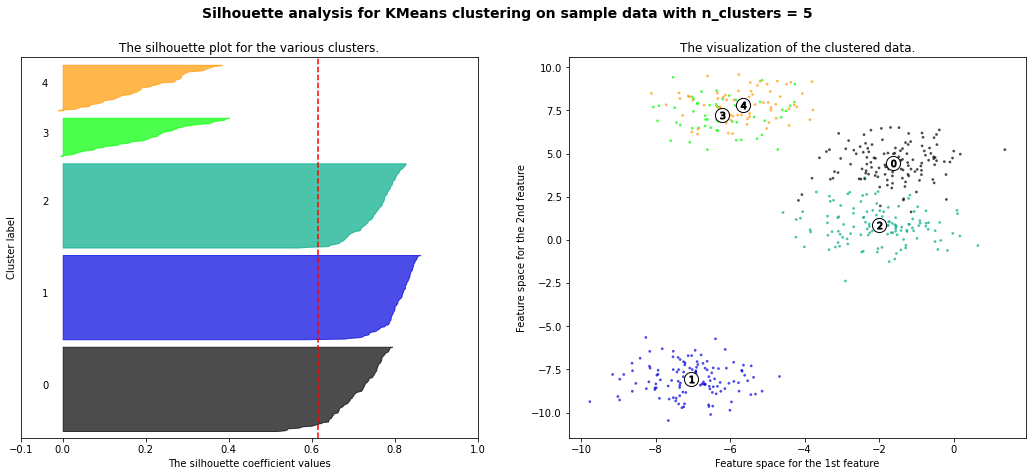

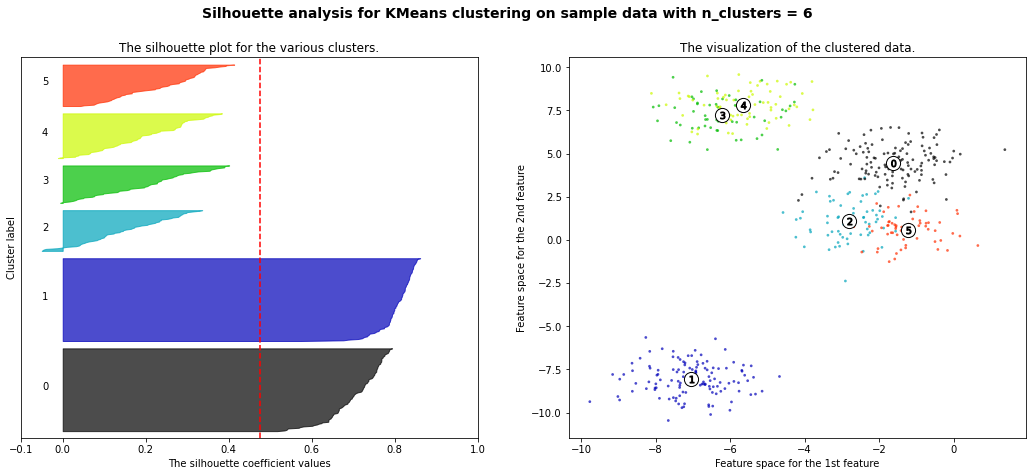

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=4,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [33]:
# Other

In [133]:
y = data_four['target']
X = data_four[['SIO2','TIO2','AL2O3','FEOT','MNO','MGO','CAO','NA2O','K2O','P2O5',
                       'BA','RB','SR','TH','ZR']]

In [134]:
X

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
186,68.089,0.531,16.421,2.904,0.04,1.111,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9
197,69.675,0.539,15.073,2.795,0.05,1.088,2.496,2.795,5.290,0.20,496.1,278.2,266.2,25.0,159.2
198,69.965,0.570,15.292,2.999,0.05,1.009,2.299,3.198,4.398,0.22,504.7,247.3,256.5,28.5,178.7
201,69.977,0.471,15.117,2.603,0.05,1.011,2.503,3.103,5.006,0.16,587.9,233.8,285.9,21.8,155.5
205,70.207,0.460,15.402,2.400,0.04,0.910,2.500,3.300,4.600,0.18,407.3,258.8,260.4,23.1,133.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,70.000,0.540,14.900,2.800,0.05,1.110,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7
3029,69.921,0.610,14.804,3.001,0.05,1.190,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0
3030,70.393,0.590,14.599,2.900,0.05,1.160,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8
3031,68.945,0.610,15.288,2.998,0.05,1.219,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3


In [135]:
X, y = make_blobs(n_samples=2000,
                  centers=4,
                  cluster_std=1,
                  shuffle=True,
                  random_state=42)  # For reproducibility

In [136]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

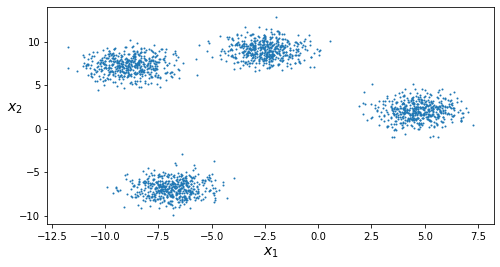

In [193]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
#save_fig("blobs_plot")
plt.show()

In [99]:
# Fit n Predict

In [100]:
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

In [101]:
y_pred

array([1, 1, 2, ..., 2, 2, 1], dtype=int32)

In [102]:
y_pred is kmeans.labels_

True

In [103]:
kmeans.cluster_centers_

array([[-8.85093829,  7.29689086],
       [ 4.69161308,  2.05025033],
       [-6.88666421, -6.85834942],
       [-2.50279204,  9.05167323]])

In [104]:
kmeans.labels_

array([1, 1, 2, ..., 2, 2, 1], dtype=int32)

In [106]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [107]:
# Decision Boundaries

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1],'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

No handles with labels found to put in legend.


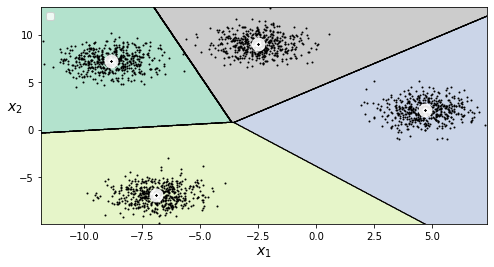

In [139]:
plt.figure(figsize=(8, 4))

plot_decision_boundaries(kmeans, X)
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()


In [140]:
# Hard vs Soft clustering

In [144]:
# Predict new instances
X_new = np.array([[0,1],[2,3]])
kmeans.predict(X_new)

kmeans.transform(X_new)

array([[10.86231757,  4.8077291 , 10.4489138 ,  8.4316908 ],
       [11.67073831,  2.85426092, 13.27252252,  7.54306868]])

In [145]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[10.86231757,  4.8077291 , 10.4489138 ,  8.4316908 ],
       [11.67073831,  2.85426092, 13.27252252,  7.54306868]])

In [156]:
kmeans_iter1 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=42)
kmeans_iter2 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=21)
kmeans_iter3 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=68)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=4, n_init=1,
       random_state=68)

No handles with labels found to put in legend.


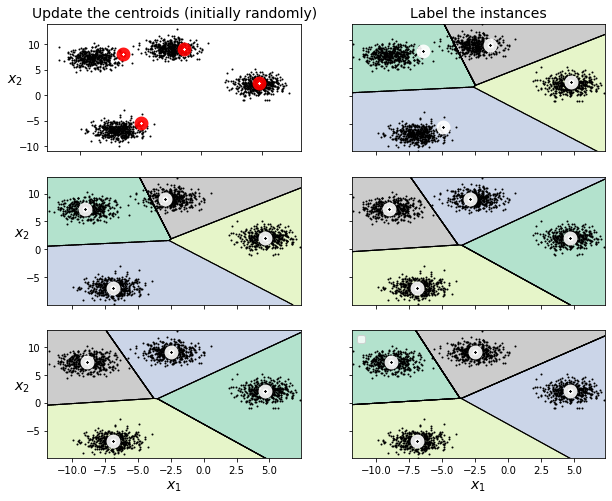

In [185]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.legend(loc='upper left')

#save_fig("kmeans_algorithm_plot")
plt.show()

In [158]:
# Variability

In [159]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

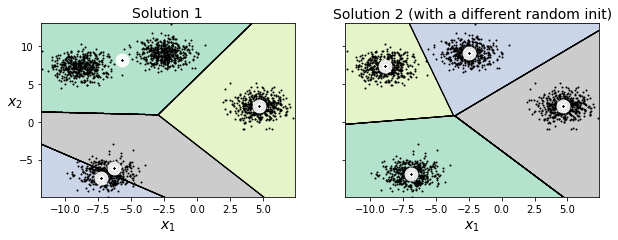

In [160]:
kmeans_rnd_init1 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

#save_fig("kmeans_variability_plot")
plt.show()

In [161]:
# Inertia

kmeans.inertia_

3964.597890083296

In [162]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

3964.5978900833147

In [163]:
kmeans.score(X)

-3964.5978900832965

In [164]:
# Finding optimal number of clusters

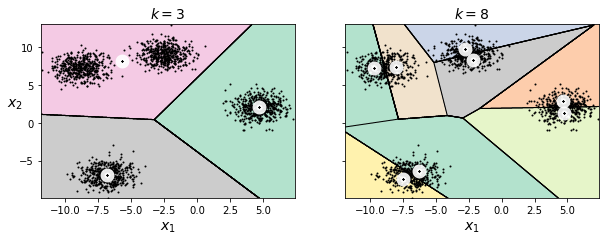

In [166]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
#save_fig("bad_n_clusters_plot")
plt.show()

In [167]:
kmeans_k3.inertia_

14809.1533569517

In [168]:
kmeans_k8.inertia_

2634.399773511169

In [172]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

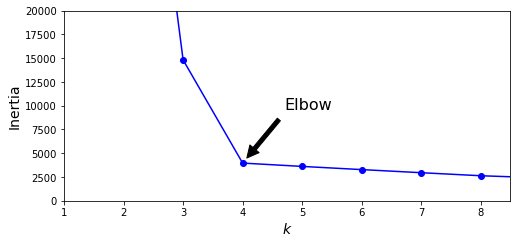

In [175]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 20000])
#save_fig("inertia_vs_k_plot")
plt.show()

In [176]:
# k = 4 , 4 clusters is best

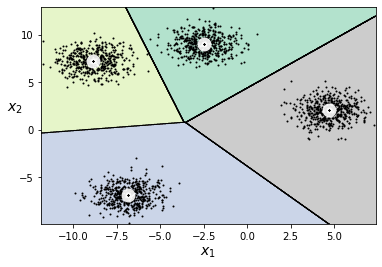

In [177]:

plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [178]:
silhouette_score(X, kmeans.labels_)

0.7892992103510692

In [179]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

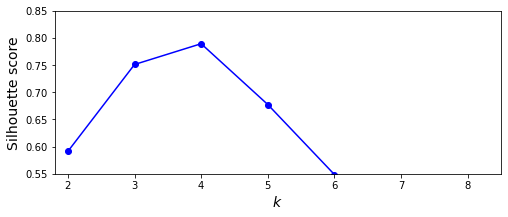

In [183]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.85])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

In [184]:
# k=4 is the best choice followed by 3


# DBSCAN

In [ ]:
from sklearn import metrics
# data
centers

data_four_elements = data_four[features]
coordinates = data_four_elements[['LONGITUDE','LATITUDE']]
target = data_four_elements['target']

data_four_elements = data_four_elements.drop(['LATITUDE','LONGITUDE','target'],axis=1)


data_four_elements

In [ ]:
#from mpl_toolkits.basemap import Basemap

llon = -80
ulon = -60
llat = -10
ulat = -50

# selecting boundaries of the map from lat/ long 
coordinates = coordinates[(coordinates['LONGITUDE']> llon) & (coordinates['LONGITUDE'] < ulon)
                          & (coordinates['LATITUDE']> llat) & (coordinates['LATITUDE'] < ulat)]

#my_map = Basemap(projection = 'merc',
#                resolution = 'l', area_thresh = 1000.0,
#                llcrnrlon = llon, llcrnrlat = llat, # min long
#                urcrnlon = ulon, urcrnrlat = ulat) # max long
                      
#my_map.drawcoastlines()
#my_map.drawcountries()
#my_map.drawlsmask(land_color = 'orange', ocean_color = 'skyblue')
#my_map.bluemarble()

#xs,ys = my_map(np.asarray(coordinates.Long), np.asarray(coordinates.Lat))
#coordinates['xm']= xs.tolist()
#coordinates['ym']= ys.tolist()

In [ ]:
data_four_elements = StandardScaler().fit_transform(data_four_elements)

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(data_four_elements)
labels = db.labels_
print(labels)

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [ ]:
set(labels)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))